In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import math as m

## Modèle binomial (Arbre)


On distingue le cas $k=n-1$ des autres cas.

In [2]:
def h(S,K):
    return max(S-K,0)


def call(S, u, d,r,K):
    Su = S*u
    Sd = S*d
    q = (1+r-d)/(u-d)
    return (h(Su,K)*q+(1-q)*h(Sd,K))/(1+r)

def delta(S, u, d,r,K):
    return (h(S*u,K)-h(S*d,K))/(S*(u-d))

def arbre(S_0, u, d,r,K,n,k):
    vect_call = []
    vect_strat = []
    S = S_0*(u**(n-1))
    for i in range(n):
        vect_call.append(call(S, u, d,r,K))
        vect_strat.append(delta(S, u, d,r,K))
        S = S*d/u
    vect_call = np.array(vect_call)
    q = (1+r-d)/(u-d)
    for i in range(0,n-k-1):
        vect_call = (q*vect_call[:-1]+(1-q)*vect_call[1:])/(1+r)
    if(k<n-1):
        return vect_call
    else:
        return vect_call, vect_strat

def deltas(calls,u,d,S_0,k):
    Su = S_0*u**(k+1)
    Sd = S_0*d*u**(k)
    deter = [Su-Sd]
    for i in range(k-1):
        Su = Sd
        Sd = Sd*d/u
        deter.append(Su-Sd)
    deter = np.array(deter)
    return (calls[:-1]-calls[1:])/deter
        

In [3]:
def binomial_tree_fast(K,T,S0,r,N,u,d,opttype='C'):
    #precompute constants
    # dt = T/N
    q = ((1+r) - d) / (u-d) # (np.exp(r*dt) - d) / (u-d)
    disc = 1/(1+r)  # np.exp(-r*dt)
    
    # initialise asset prices at maturity - Time step N
    S = S0 * d ** (np.arange(N,-1,-1)) * u ** (np.arange(0,N+1,1)) 
    
    # initialise option values at maturity
    if opttype == 'P':
        C = np.maximum(0, K - S)
    else:
        C = np.maximum(0, S - K)
        
    # step backwards through tree(backward recursion through the tree)
    for i in np.arange(N,0,-1):
        C = disc * ( q * C[1:i+1] + (1-q) * C[0:i] )
    
    return C[0]

In [4]:
S_0=4
K=5
r=0.25
u=2
d=0.5
n=2
k=1

#call(S, u, d,r,K)
arbre(S_0, u, d,r,K,n,k)
calls = arbre(S_0, u, d,r,K,n,k+1)
#deltas(calls,u,d,S_0,k)
arbre(S_0, u, d,r,K,n,k)

(array([4.4, 0. ]), [0.9166666666666666, 0.0])

In [5]:
def h(S,K):
    return max(S**2 - K,0)


def call(S, u, d,r,K):
    Su = S*u
    Sd = S*d
    q = (1+r-d)/(u-d)
    return (h(Su,K)*q+(1-q)*h(Sd,K))/(1+r)

def arbre(S_0, u, d,r,K,n,k):
    vect_call = []
    vect_strat = []
    S = S_0*(u**(n-1))
    for i in range(n):
        vect_call.append(call(S, u, d,r,K))
        vect_strat.append(delta(S, u, d,r,K))
        S = S*d/u
    vect_call = np.array(vect_call)
    q = (1+r-d)/(u-d)
    for i in range(0,n-k-1):
        vect_call = (q*vect_call[:-1]+(1-q)*vect_call[1:])/(1+r)
    if(k<n-1):
        return vect_call
    else:
        return vect_call, vect_strat

In [6]:
S_0=10.08
K=99.56
r=0.004
u=1+1.93/100
d=1-2.57/100
n=2
k=0
arbre(S_0, u, d,r,K,n,k)

array([4.66274817])

In [7]:
S_0=10.08
K=100.84
r=0.005
p=0.77
x=1.87
y=1.47
u=1+x/100
d=1-y/100
n=2
k=0

arbre(S_0, u, d,r,K,n,k)

array([3.68655807])

In [8]:
def h(S,K):
    return max(S - K,0)


def call(S, u, d,r,K):
    Su = S*u
    Sd = S*d
    q = (1+r-d)/(u-d)
    return (h(Su,K)*q+(1-q)*h(Sd,K))/(1+r)

def arbre(S_0, u, d,r,K,n,k):
    vect_call = []
    vect_strat = []
    S = S_0*(u**(n-1))
    for i in range(n):
        vect_call.append(call(S, u, d,r,K))
        vect_strat.append(delta(S, u, d,r,K))
        S = S*d/u
    vect_call = np.array(vect_call)
    q = (1+r-d)/(u-d)
    for i in range(0,n-k-1):
        vect_call = (q*vect_call[:-1]+(1-q)*vect_call[1:])/(1+r)
    if(k<n-1):
        return vect_call
    else:
        return vect_call, vect_strat

In [9]:
S_0=9.95
K=99.67
r=0.008
p=0.27
x=10.12
y=9.19

u=1+x/100
d=1-y/100

n=8
k=0
arbre(S_0, u, d,r,K,n,k)

array([0.])

In [10]:
S_0=10.01
K=99.97
r=0.000
p=0.37
x=5.05
y=4.81

u=1+x/100
d=1-y/100

n=10
k=0
arbre(S_0, u, d,r,K,n,k)

array([0.])

In [11]:
def binomial_tree_fast(K,S0,r,N,u,d,opttype='C'):
    #precompute constants
    # dt = T/N
    q = ((1+r) - d) / (u-d) # (np.exp(r*dt) - d) / (u-d)
    disc = 1/(1+r)  # np.exp(-r*dt)
    
    # initialise asset prices at maturity - Time step N
    S = S0 * d ** (np.arange(N,-1,-1)) * u ** (np.arange(0,N+1,1)) 
    
    # initialise option values at maturity
    if opttype == 'P':
        C = np.maximum(0, K - S)
    else:
        C = np.maximum(0, S - K)
        
    # step backwards through tree(backward recursion through the tree)
    for i in np.arange(N,0,-1):
        C = disc * ( q * C[1:i+1] + (1-q) * C[0:i] )
    
    return C[0]

In [12]:
def h(S,K):
    return max(K-S,0)


def call(S, u, d,r,K):
    Su = S*u
    Sd = S*d
    q = (1+r-d)/(u-d)
    return (h(Su,K)*q+(1-q)*h(Sd,K))/(1+r)

def arbre(S_0, u, d,r,K,n,k):
    vect_call = []
    vect_strat = []
    S = S_0*(u**(n-1))
    for i in range(n):
        vect_call.append(call(S, u, d,r,K))
        vect_strat.append(delta(S, u, d,r,K))
        S = S*d/u
    vect_call = np.array(vect_call)
    q = (1+r-d)/(u-d)
    for i in range(0,n-k-1):
        vect_call = (q*vect_call[:-1]+(1-q)*vect_call[1:])/(1+r)
    if(k<n-1):
        return vect_call
    else:
        return vect_call, vect_strat

In [13]:
S_0=10.04
K=99.68
r=0.001
p=0.69
x=12.78
y=11.33

u=1+x/100
d=1-y/100

n=10
k=0

binomial_tree_fast(K,S_0,r,n,u,d,opttype='P')- arbre(S_0, u, d,r,K,n,k)

array([5.68434189e-14])

In [14]:
S_0=10.10
K=99.35
r=0.00
p=0.57
x=8.84
y=8.12

u=1+x/100
d=1-y/100

n=11
k=0
binomial_tree_fast(K,S_0,r,n,u,d,opttype='P')-arbre(S_0, u, d,r,K,n,k)

array([0.])

In [22]:
S_0=10.00
K=99.10
r=0.003
x=6.55
y=6.15

u=1+x/100
d=1-y/100

n=14
k=0
arbre(S_0, u, d,r,K,n,k)

array([85.02997001])

In [16]:
def h(S,K):
    return max(K-S,0)


def call(S, u, d,r,K):
    Su = S*u
    Sd = S*d
    q = (1+r-d)/(u-d)
    return (h(Su,K)*q+(1-q)*h(Sd,K))/(1+r)
S_0=99.94
K=99.35
r=0.004
p=0.66
x=1.38
y=2.57
u=1+x/100
d=1-y/100
call(S_0, u, d,r,K)

0.4889023248777034

## Formule de laplace pour le gaussien

In [17]:
t = 0.95
a = 1.98

-0.5*t*(a**2)

-1.8621899999999998

## Parité call/put

In [18]:
C=6.23
T=5
r=3.80/100
S=28.53

P=C-S*(1-np.exp(-r*T))

In [19]:
P

1.2931440914041268

## Black-Scholes Call and Put (sans dividende)

### Call BS

$$Call^{BS}(0, T, S_{0}, K, \sigma, r) := S_0 N(d_{+}) - Ke^{-rT}N(d_{-})$$

avec $$d_{{+}_{-}} = \frac{1}{\sigma \sqrt{T}} log(\frac{S_0 e^{rT}}{K}) +_{-}\frac{1}{2}\sigma \sqrt{T}$$

In [20]:
def callBS(S_0, T, K, r, sigma):
    d1 = np.log(S_0 * np.exp(r * T) / K) / (sigma * np.sqrt(T)) + 0.5 * sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    return S_0 * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)

In [21]:
S_0= 96.83
K= 91.55
r = 0.009
sigma= 0.2595
T= 0.779
q=0

callBS(S_0, T, K, r, sigma)

11.839302990191612

In [32]:
S_0=95.55
T=0.991
K=98.39
r=0.065
q=0.000000
sigma=0.1375

callBS(S_0, T, K, r, sigma)

6.940155243259433

### Put Black Scholes

   Parité call/Put : $$ Put = call - S_0 + Ke^{-rT}$$

In [33]:
def putBS(S_0, T, K, r, sigma):
    return callBS(S_0, T, K, r, sigma)-S_0+K*np.exp(-r*T)

In [34]:
S_0=96.70000
T=0.905000
K=96.8600000
r=0.02900
q=0.000000
sigma=0.1038000

putBS(S_0, T, K, r, sigma)

2.7030540232174616

In [35]:
S_0=90.77
T=0.498
K=98.74
r=0.044
q=0.000000
sigma=0.2817

putBS(S_0, T, K, r, sigma)

10.692021662139481

## Greeks

### Le Delta

In [36]:
def delta(sigma, T,S_0,r,K):
    d1 = np.log(S_0 * np.exp(r * T) / K) / (sigma * np.sqrt(T)) + 0.5 * sigma * np.sqrt(T)
    return norm.cdf(d1)
def deltaPut(sigma, T,S_0,r,K):
    return delta(sigma, T,S_0,r,K)-1

In [37]:
S_0=91.870000
T=0.227000
K=96.8200000
r=0.05400
q=0.000000
sigma=0.1178000

delta(sigma, T,S_0,r,K)

0.2455476723122625

### Le Gamma

In [38]:
def gamma(sigma, T,S_0,r,K):
    d1 = np.log(S_0 * np.exp(r * T) / K) / (sigma * np.sqrt(T)) + 0.5 * sigma * np.sqrt(T)
    return ((1/np.sqrt(2*m.pi))*np.exp(-0.5*d1**2))/(S_0*sigma*np.sqrt(T))

# gammaput == gammacall

In [39]:
S_0=96.210000
T=0.845000
K=99.5100000
r=0.03500
q=0.000000
sigma=0.2042000

gamma(sigma, T,S_0,r,K)

0.022033727984882484

### Le vega

In [40]:
def vega(S_0,T,K,r,q,sigma):
    d1 = np.log(S_0 * np.exp(r * T) / K) / (sigma * np.sqrt(T)) + 0.5 * sigma * np.sqrt(T)
    return S_0*np.sqrt(T)*((1/np.sqrt(2*m.pi))*np.exp(-0.5*d1**2))

# les vegas sont les mêmes Put/call

## Implied volatility with Newton-Raphson Algorithm

In [41]:
# les volatilités implicites sont les mêmes

def black_scholes(S_0,T,K,r,q,sigma):
    d1 = np.log(S_0 * np.exp(r * T) / K) / (sigma * np.sqrt(T)) + 0.5 * sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    C_0 = S_0 * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
    return C_0

def vega(S_0,T,K,r,q,sigma):
    d1 = np.log(S_0 * np.exp(r * T) / K) / (sigma * np.sqrt(T)) + 0.5 * sigma * np.sqrt(T)
    return S_0*np.sqrt(T)*((1/np.sqrt(2*m.pi))*np.exp(-0.5*d1**2))


def sigma_0(S_0,T,K,r):
    inter = (2/T)*np.log((S_0*np.exp(r*T))/K)
    if inter>=0: 
        return np.sqrt(inter)
    else: 
        return np.sqrt(-inter)
    
def implied_volatility(S_0,T,K,r,q, market_call, Niter=5):
    sig = sigma_0(S_0,T,K,r) # initialisation
    sigs = []
    for i in range(Niter):
        call = black_scholes(S_0,T,K,r,q,sig)
        veg = vega(S_0,T,K,r,q,sig)
        sig = sig - (call - market_call)/veg
        sigs.append(sig)
    
    return sigs

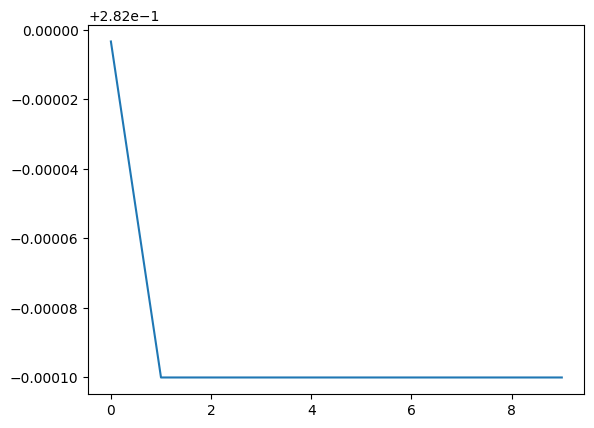

0.2818999944420369

In [42]:
S_0=97.92
T=0.773
K=99.04
r=0.082
q=0.000000

C_0 = 12.099431

table = implied_volatility(S_0,T,K,r,q, C_0, Niter=10)

plt.plot(table)
#plt.axhline(sigma, c = 'r')
plt.show()

table[6]

## Delta hedging

### pour un call

In [43]:
import pandas as pd

In [44]:
data = pd.read_csv("data.csv", sep = ";")
time = data["Date"]
As = data["Spot"]
S=[float(s) for s in As]
times = [float(t) for t in time]
S[0]

103.54

In [45]:
def delta_hedging(S,times, T, K, sigma, r,q):
    N = len(S)
    V = black_scholes(S[0],T,K,r,q,sigma) # le prix call black scholes est important
    Delta = delta(sigma, T,S[0],r,K) # le delta est aussi important
    
    amount_actif_avr = 0
    amount_actif_apr = Delta*S[0]
    cash_av = 0
    cash_ap = V - amount_actif_apr
    valeur_int = [max(0, S[0] - K)] # la valeur intrinsèque va changer pour put
    for i in range(1,N-1):
        V = V + Delta*(S[i]-S[i-1])+ (V-amount_actif_apr)*(np.exp(r*(times[i]-times[i-1]))-1) # autofinancement
        amount_actif_avr = Delta*S[i]
        Delta = delta(sigma, T-times[i],S[i],r,K)
        amount_actif_apr = Delta*S[i]
        cash_av = cash_ap*np.exp(r*(times[i]-times[i-1]))# ligne un peu inutile
        cash_ap = V - amount_actif_apr
        valeur_int.append(max(0, S[i] - K))
        
    V = amount_actif_avr + cash_av
    return V-max(0, S[-1] - K)

In [46]:
T = 0.894
K = 100.59
sigma = 0.2383
r = 0.008
q = 0.000

delta_hedging(S,times, T, K, sigma, r,q)

-0.2625602668260285

### Pour un Put

In [47]:
def delta_hedging(S,times, T, K, sigma, r,q):
    N = len(S)
    #print(type(S[0]))
    V = black_scholes(S[0],T,K,r,q,sigma) -S[0]+K*np.exp(-r*T) # le prix call black scholes est important
    #print(V)
    Delta = delta(sigma, T,S[0],r,K) -1 # le delta est aussi important
    #print(Delta)
    amount_actif_avr = 0
    amount_actif_apr = Delta*S[0]
    cash_av = 0
    cash_ap = V - amount_actif_apr
    valeur_int = [max(0, K-S[0])] # la valeur intrinsèque va changer pour put
    for i in range(1,N-1):
        V = V + Delta*(S[i]-S[i-1])+ (V-amount_actif_apr)*(np.exp(r*(times[i]-times[i-1]))-1)
        amount_actif_avr = Delta*S[i]
        Delta = delta(sigma, T-times[i],S[i],r,K)-1
        amount_actif_apr = Delta*S[i]
        cash_av = cash_ap*np.exp(r*(times[i]-times[i-1]))
        cash_ap = V - amount_actif_apr
        valeur_int.append(max(0, K-S[i]))
        #print(V)
    V = amount_actif_avr + cash_av
    return V-max(0, K-S[-1])

In [48]:
T = 0.894
K = 100.59
sigma = 0.2383
r = 0.008
q = 0.000

delta_hedging(S,times, T, K, sigma, r,q)

-0.15694820426911463

## Extension Black-Scholes

### Black-Scholes avec dividendes

In [49]:
def black_scholes_div(S_0,T,K,r,q,sigma):
    d1 = np.log(S_0 * np.exp((r-q) * T) / K) / (sigma * np.sqrt(T)) + 0.5 * sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    C_0 = np.exp(-q*T)*(S_0 * norm.cdf(d1) - K * np.exp(-(r-q)*T)*norm.cdf(d2))
    return C_0

def put_div(S_0,T,K,r,q,sigma):
    d1 = np.log(S_0 * np.exp((r-q) * T) / K) / (sigma * np.sqrt(T)) + 0.5 * sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    P = np.exp(-q*T)*(K * norm.cdf(-d1) - S_0 * np.exp(-(r-q)*T)*norm.cdf(-d2))
    return P

In [50]:
S_0=92.130000
T=0.320000
K=92.600000
r=0.004000
q=0.027000
sigma=0.130400

black_scholes_div(S_0,T,K,r,q,sigma)

2.1704465320364967

In [51]:
S_0=99.360000
T=0.922000
K=98.420000
r=0.018000
q=0.061000
sigma=0.280400

black_scholes_div(S_0,T,K,r,q,sigma)

8.83879831582432

In [52]:
S_0=90.240000
T=0.492000
K=97.67000
r=0.075000
q=0.009000
sigma=0.175800

black_scholes_div(S_0,T,K,r,q,sigma)

2.6964603448916753

### The Greeks

#### le delta

In [53]:
def delta_div(sigma, T,S_0,r,q,K):
    d1 = np.log(S_0 * np.exp((r-q) * T) / K) / (sigma * np.sqrt(T)) + 0.5 * sigma * np.sqrt(T)
    return np.exp(-q * T)*norm.cdf(d1)


def delta_div_Put(sigma, T,S_0,r,q,K):
    return 1-delta_div(sigma, T,S_0,r,q,K)

#### le gamma

In [54]:
def gamma(sigma, T,S_0,r,K):
    d1 = np.log(S_0 * np.exp((r-q) * T) / K) / (sigma * np.sqrt(T)) + 0.5 * sigma * np.sqrt(T)
    return np.exp(-q*T)((1/np.sqrt(2*m.pi))*np.exp(-0.5*d1**2))/(S_0*sigma*np.sqrt(T))

#### le vega

In [55]:
def vega_div(S_0,T,K,r,q,sigma):
    d1 = np.log(S_0 * np.exp((r-q) * T) / K) / (sigma * np.sqrt(T)) + 0.5 * sigma * np.sqrt(T)
    return S_0*np.exp(-q*T)*np.sqrt(T)*((1/np.sqrt(2*m.pi))*np.exp(-0.5*d1**2))

### Power options

In [56]:
import numpy as np
from scipy.stats import norm

In [57]:
def black_scholes_powero(S_0,T,K,r,q,sigma,n):
    d1 = (np.log(S_0/(K**(1/n))) + (r-q +(n-0.5)*(sigma**2))*T)/(sigma*np.sqrt(T))
    d2 = d1 - n*sigma*np.sqrt(T)
    S = (S_0**n)*np.exp(((n-1)*(r+0.5*n*sigma**2)-n*q)*T)
    return S*norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)

In [58]:
n=4
S_0=1.06
T=0.228
K=0.97
r=0.033
q=0.065
sigma=0.1205

black_scholes_powero(S_0,T,K,r,q,sigma,n)

0.2956965661898294

In [59]:
n=5
S_0=1.030000
T=0.654000
K=0.930000
r=0.009000
q=0.080000
sigma=0.177700

black_scholes_powero(S_0,T,K,r,q,sigma,n)

0.3966849136035697

In [60]:
n=3
S_0=0.910000
T=0.642000
K=1.040000
r=0.038000
q=0.055000
sigma=0.108300

black_scholes_powero(S_0,T,K,r,q,sigma,n)

0.010645328656844574

In [61]:
def black_scholes_poweroP(S_0,T,K,r,q,sigma,n):
    d1 = (np.log(S_0/(K**(1/n))) + (r-q +(n-0.5)*(sigma**2))*T)/(sigma*np.sqrt(T))
    d2 = d1 - n*sigma*np.sqrt(T)
    S = (S_0**n)*np.exp(((n-1)*(r+0.5*n*sigma**2)-n*q)*T)
    return K * np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

### Log-Normal déplacée

In [62]:
def black_scholes_LND(S_0,T,K,r,q,sigma,a):
    return black_scholes(S_0+a,T,K+a,r,q,sigma)

In [63]:
S_0=92.540000
T=0.811000
K=96.790000
sigma=0.239800
a=23.180000
q=0.000
r=0.000

black_scholes_LND(S_0,T,K,r,q,sigma,a)

8.148426761078738

In [64]:
S_0=99.470000
T=0.765000
K=90.610000
sigma=0.151600
a=31.160000

q=0.000
r=0.000

black_scholes_LND(S_0,T,K,r,q,sigma,a)

12.013593282729488

In [65]:
S_0=98.270000
T=0.696000
K=92.890000
sigma=0.123000
a=28.540000

q=0.000
r=0.000

black_scholes_LND(S_0,T,K,r,q,sigma,a)

8.215065142329053

### Modèle Bachelier

In [66]:
def prix_bach(S_0,T,K,r,sigma):
    Si = (S_0 -K)/(sigma*np.sqrt(T))
    return sigma*np.sqrt(T)*(Si*norm.cdf(Si) + (1/np.sqrt(2*m.pi))*np.exp(-0.5*Si**2))

## IV with log-forwward moneyness

In [68]:
T=0.662
F = 121.519


df = pd.read_csv("fx_data.csv", sep = ";")
df

,Strike,IV,Unnamed: 2
0,26.313622,0.842208,NaN
1,26.387478,0.841558,NaN
2,26.461540,0.840908,NaN
3,26.535811,0.840258,NaN
4,26.610290,0.839607,NaN
...,...,...,...
995,427.894021,0.631545,NaN
996,429.095005,0.632021,NaN
997,430.299361,0.632496,NaN
998,431.507097,0.632972,NaN


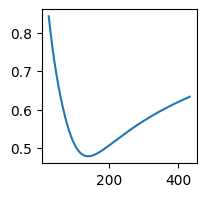

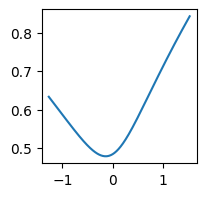

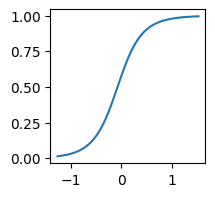

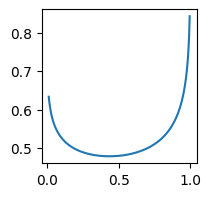

In [69]:
plt.figure(figsize = (2,2))
plt.plot(df["Strike"],df["IV"])
plt.show()

plt.figure(figsize = (2,2))
logMon = np.log(F/df["Strike"])
plt.plot(logMon,df["IV"])
plt.show()

plt.figure(figsize = (2,2))
deltas = norm.cdf((1/(df["IV"]*np.sqrt(T)))*logMon + 0.5*(df["IV"]*np.sqrt(T)))
plt.plot(logMon,deltas)
plt.show()
plt.figure(figsize = (2,2))
plt.plot(deltas,df["IV"])
plt.show()

In [71]:
T =0.446
F =106.707


df = pd.read_csv("fx_data.csv", sep = ";")
df

,Strike,IV,Unnamed: 2
0,26.313622,0.842208,NaN
1,26.387478,0.841558,NaN
2,26.461540,0.840908,NaN
3,26.535811,0.840258,NaN
4,26.610290,0.839607,NaN
...,...,...,...
995,427.894021,0.631545,NaN
996,429.095005,0.632021,NaN
997,430.299361,0.632496,NaN
998,431.507097,0.632972,NaN


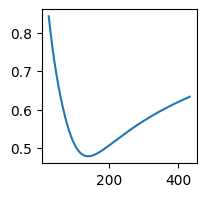

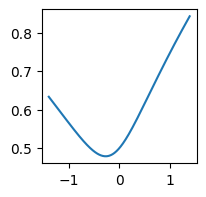

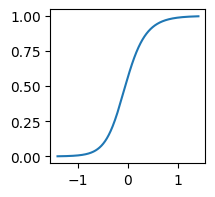

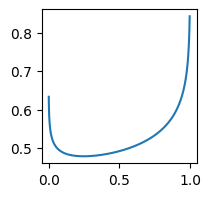

In [72]:
plt.figure(figsize = (2,2))
plt.plot(df["Strike"],df["IV"])
plt.show()

plt.figure(figsize = (2,2))
logMon = np.log(F/df["Strike"])
plt.plot(logMon,df["IV"])
plt.show()

plt.figure(figsize = (2,2))
deltas = norm.cdf((1/(df["IV"]*np.sqrt(T)))*logMon + 0.5*(df["IV"]*np.sqrt(T)))
plt.plot(logMon,deltas)
plt.show()

plt.figure(figsize = (2,2))
plt.plot(deltas,df["IV"])
plt.show()

In [73]:
#deltas

In [74]:
for i in range(len(deltas)):
    if(deltas[i]<0.25):
        break
-0.25+deltas[i-1],0.25-deltas[i], df["IV"][i-1], df["IV"][i]

(0.002092461743165075, 0.0006982253318675857, 0.479057, 0.479053)

In [75]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(np.array([deltas[len(deltas)-1 - i] for i in range(len(deltas))]),df['IV'].values[::-1])
cs(0.25)

array(0.47905361)

In [76]:
T=0.878000
F=90.537000

df = pd.read_csv("impvol.csv", sep = ";")
df

FileNotFoundError: [Errno 2] No such file or directory: 'impvol.csv'

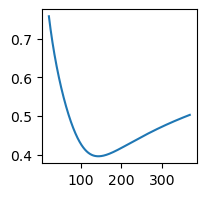

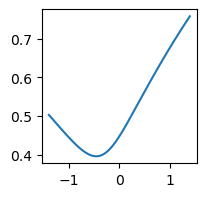

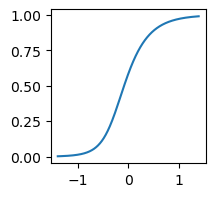

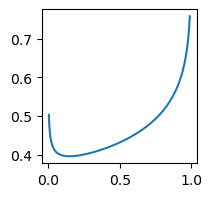

In [ ]:
plt.figure(figsize = (2,2))
plt.plot(df["Strike"],df["IV"])
plt.show()

plt.figure(figsize = (2,2))
logMon = np.log(F/df["Strike"])
plt.plot(logMon,df["IV"])
plt.show()

plt.figure(figsize = (2,2))
deltas = norm.cdf((1/(df["IV"]*np.sqrt(T)))*logMon + 0.5*(df["IV"]*np.sqrt(T)))
plt.plot(logMon,deltas)
plt.show()

plt.figure(figsize = (2,2))
plt.plot(deltas,df["IV"])
plt.show()

In [ ]:
for i in range(len(deltas)):
    if(deltas[i]<0.25):
        break
-0.25+deltas[i-1],0.25-deltas[i], df["IV"][i-1], df["IV"][i]

(0.0007844250468659331, 0.0017417735348024266, 0.401635, 0.401441)

In [ ]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(np.array([deltas[len(deltas)-1 - i] for i in range(len(deltas))]),df['IV'].values[::-1])
cs(0.25)

array(0.40157434)

In [ ]:
T=0.562000
F=106.875000

df = pd.read_csv("smilevol3.csv", sep = ";")
df

,Strike,IV,Unnamed: 2
0,26.355051,0.838361,NaN
1,26.429022,0.837726,NaN
2,26.503201,0.837091,NaN
3,26.577589,0.836455,NaN
4,26.652185,0.835819,NaN
...,...,...,...
995,428.567699,0.505283,NaN
996,429.770575,0.505679,NaN
997,430.976826,0.506076,NaN
998,432.186464,0.506472,NaN


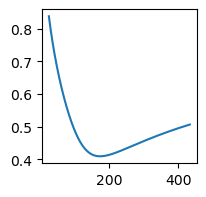

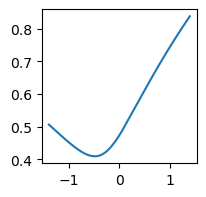

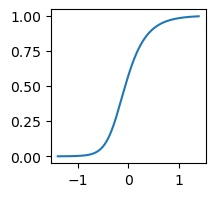

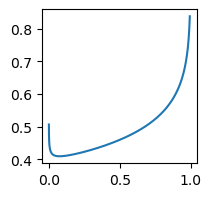

In [ ]:
plt.figure(figsize = (2,2))
plt.plot(df["Strike"],df["IV"])
plt.show()

plt.figure(figsize = (2,2))
logMon = np.log(F/df["Strike"])
plt.plot(logMon,df["IV"])
plt.show()

plt.figure(figsize = (2,2))
deltas = norm.cdf((1/(df["IV"]*np.sqrt(T)))*logMon + 0.5*(df["IV"]*np.sqrt(T)))
plt.plot(logMon,deltas)
plt.show()

plt.figure(figsize = (2,2))
plt.plot(deltas,df["IV"])
plt.show()

In [ ]:
for i in range(len(deltas)):
    if(deltas[i]<0.25):
        break
-0.25+deltas[i-1],0.25-deltas[i], df["IV"][i-1], df["IV"][i]

(0.002617128710026728, 0.00045783133888543937, 0.423679, 0.423325)

In [ ]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(np.array([deltas[len(deltas)-1 - i] for i in range(len(deltas))]),df['IV'].values[::-1])
cs(0.25)

array(0.42337753)

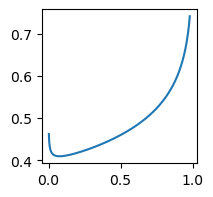

In [ ]:
plt.figure(figsize = (2,2))
plt.plot(deltas,cs(deltas))
plt.show()

## IV with dividend

In [ ]:
def black_scholes_div(S_0,T,K,r,q,sigma):
    d1 = np.log(S_0 * np.exp((r-q) * T) / K) / (sigma * np.sqrt(T)) + 0.5 * sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    C_0 = np.exp(-q*T)*(S_0 * norm.cdf(d1) - K * np.exp(-(r-q)*T)*norm.cdf(d2))
    return C_0

def vega_div(S_0,T,K,r,q,sigma):
    d1 = np.log(S_0 * np.exp((r-q) * T) / K) / (sigma * np.sqrt(T)) + 0.5 * sigma * np.sqrt(T)
    return S_0*np.exp(-q*T)*np.sqrt(T)*((1/np.sqrt(2*m.pi))*np.exp(-0.5*d1**2))


def sigma_0(S_0,T,K,r,q):
    inter = (2/T)*np.log((S_0*np.exp((r-q)*T))/K)
    if inter>=0: 
        return np.sqrt(inter)
    else: 
        return np.sqrt(-inter)
    
def implied_volatility(S_0,T,K,r,q, market_call, Niter=5):
    sig = sigma_0(S_0,T,K,r,q) # initialisation
    sigs = []
    for i in range(Niter):
        call = black_scholes_div(S_0,T,K,r,q,sig)
        veg = vega_div(S_0,T,K,r,q,sig)
        sig = sig - (call - market_call)/veg
        sigs.append(sig)
    
    return sigs

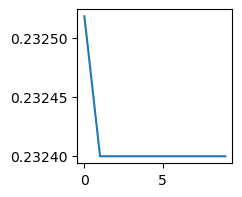

0.2323999812730129

In [ ]:
T=0.461000
K=96.610000
S_0=97.410000
r=0.075000
q=0.036000

C_0 = 7.268556

table = implied_volatility(S_0,T,K,r,q, C_0, Niter=10)

plt.figure(figsize = (2,2))
plt.plot(table)
#plt.axhline(sigma, c = 'r')
plt.show()

table[6]

In [ ]:

t=5.89
s=2.04

2*s**2 + s*t

20.3388

In [ ]:
t=6.85
s=4.85

2*s**2 + s*t

80.26749999999998

In [ ]:
t=6.15
s=2.99

2*s**2 + s*t

36.26870000000001

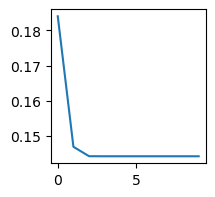

0.14429999955408945

In [ ]:
T=0.032000
K=93.660000
S_0=91.520000
r=0.038000
q=0.055000

C_0 = 0.232490
table = implied_volatility(S_0,T,K,r,q, C_0, Niter=10)

plt.figure(figsize = (2,2))
plt.plot(table)
#plt.axhline(sigma, c = 'r')
plt.show()

table[6]

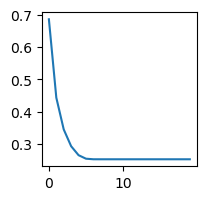

0.25279710507566566

In [ ]:
T=0.013000
K=92.270000
S_0=99.480000
r=0.060000
q=0.043000

C_0 = 7.230163

table = implied_volatility(S_0,T,K,r,q, C_0, Niter=20)

plt.figure(figsize = (2,2))
plt.plot(table)
#plt.axhline(sigma, c = 'r')
plt.show()

table[15]